# Vanilla Autoencoder
fashion_mnist Datasets: 10個類別，人身上穿的
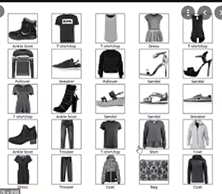

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

(x_train, _), (x_test, _) = fashion_mnist.load_data() # 用 _ 去接變數，表示不用這個變數

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

4422102/4422102 [==============================] - 2s 1us/step
(60000, 28, 28)
(10000, 28, 28)


In [2]:
latent_dim = 64 

class Autoencoder(Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim   #  code layer 的數量(隱藏層數量)
        self.encoder = tf.keras.Sequential([
            layers.Flatten(),
            layers.Dense(latent_dim, activation='relu')
        ])
        self.decoder = tf.keras.Sequential([
            layers.Dense(784, activation='sigmoid'),
            layers.Reshape((28, 28))
        ])
    
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder(latent_dim)

In [3]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0238 - val_loss: 0.0132
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0116 - val_loss: 0.0106
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0101 - val_loss: 0.0099
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0095 - val_loss: 0.0097
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0093 - val_loss: 0.0093
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0091 - val_loss: 0.0091
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0090 - val_loss: 0.0091
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0089 - val_loss: 0.0090
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.008

In [7]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

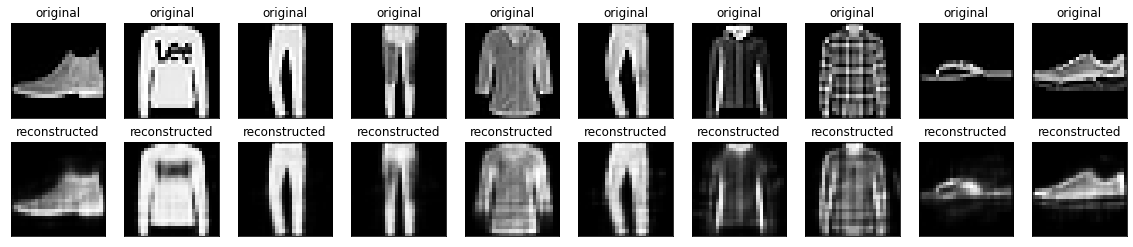

In [6]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
import tensorflow as tf
tf.compat.v1.reset_default_graph()

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [15]:
latent_dim = 2 

class Autoencoder(Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim   
        self.encoder = tf.keras.Sequential([
            layers.Flatten(),
            layers.Dense(128, activation='sigmoid'),
            layers.Dense(64, activation='sigmoid'),

            layers.Dense(latent_dim)
        ])
        self.decoder = tf.keras.Sequential([

            layers.Dense(64, activation='sigmoid'),
            layers.Dense(128, activation='sigmoid'),
            layers.Dense(784, activation='sigmoid'),
            layers.Reshape((28, 28))
        ])
    
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder(latent_dim)

In [16]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0549 - val_loss: 0.0371
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0346 - val_loss: 0.0325
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0312 - val_loss: 0.0303
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0296 - val_loss: 0.0290
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0287 - val_loss: 0.0284
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0281 - val_loss: 0.0279
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0276 - val_loss: 0.0276
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0272 - val_loss: 0.0273
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0270 - val_loss: 0.0271
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.026

In [17]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

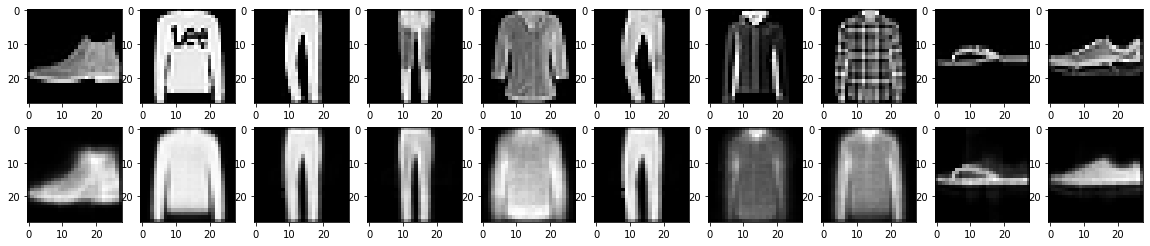

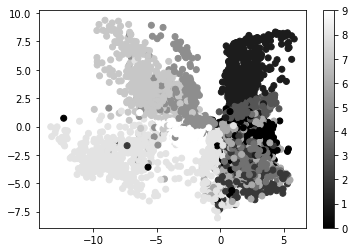

In [18]:
f, a = plt.subplots(2, 10, figsize=(20, 4))
for i in range(10):
    a[0][i].imshow(np.reshape(x_test[i], (28, 28)))
    a[1][i].imshow(np.reshape(decoded_imgs[i], (28, 28)))
plt.show()

plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=y_test)
plt.colorbar()
plt.show()

# CNN Autoencoder
transpose convolution (convolution(image 由大變小) 的逆運算) image 由小變大
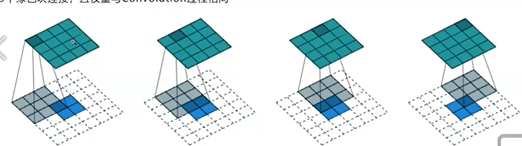
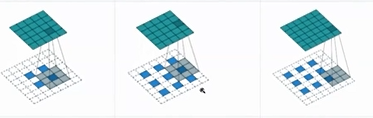

In [23]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255
print(x_train.shape)
 #  加 tf.newaxis 可以多一維度 for CNN (input 4D)
x_train = x_train[..., tf.newaxis]   # (60000,28,28,1)  
x_test = x_test[..., tf.newaxis]
print(x_train.shape)

(60000, 28, 28)
(60000, 28, 28, 1)


In [24]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 
# tf.clip_by_value 將x_train_noisy 限制在clip_value_min=0., clip_value_max=1. 之間)
x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

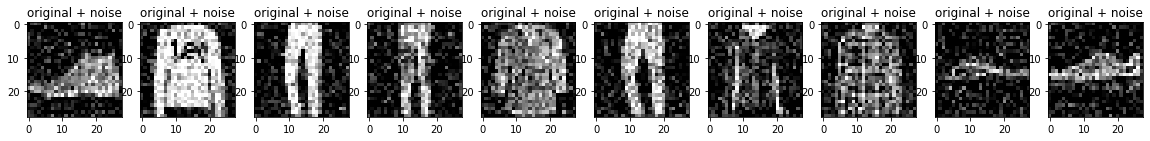

In [25]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

In [26]:
class Denoise(Model):
    def __init__(self):
        super(Denoise, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Input(shape=(28, 28, 1)), 
            layers.Conv2D(16, (3,3), activation='relu', padding='same', strides=2),
            layers.Conv2D(8, (3,3), activation='relu', padding='same', strides=2)])
        
        self.decoder = tf.keras.Sequential([
            layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
            layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
            layers.Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')])
    
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Denoise()
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [27]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0175 - val_loss: 0.0104
Epoch 2/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0097 - val_loss: 0.0091
Epoch 3/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0086 - val_loss: 0.0083
Epoch 4/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0079 - val_loss: 0.0077
Epoch 5/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0075 - val_loss: 0.0074
Epoch 6/10
1875/1875 [==============================] - 40s 22ms/step - loss: 0.0073 - val_loss: 0.0072
Epoch 7/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0071 - val_loss: 0.0072
Epoch 8/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0071 - val_loss: 0.0070
Epoch 9/10
1875/1875 [==============================] - 40s 22ms/step - loss: 0.0070 - val_loss: 0.0070
Epoch 10/10
1875/1875 [==============================] - 38s 20m

In [28]:
autoencoder.encoder.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 14, 14, 16)        160       
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________


In [29]:
autoencoder.decoder.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose_2 (Conv2DT  (None, 14, 14, 8)        584       
 ranspose)                                                       
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 28, 28, 16)       1168      
 ranspose)                                                       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 1)         145       
                                                                 
Total params: 1,897
Trainable params: 1,897
Non-trainable params: 0
_________________________________________________________________


In [30]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

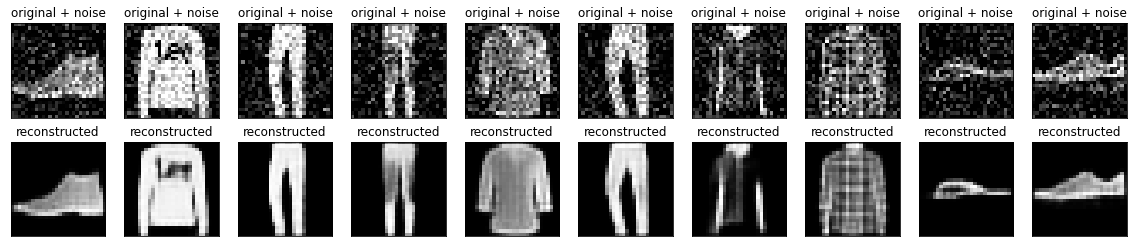

In [31]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    
    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

# VAE

In [ ]:
import os
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import Sequential, layers
from PIL import Image
from matplotlib import pyplot as plt

tf.random.set_seed(22)
np.random.seed(22)

def save_images(imgs, name):
    new_im = Image.new('L', (280, 280))
    index = 0
    for i in range(0, 280, 28):
        for j in range(0, 280, 28):
            im = imgs[index]
            im = Image.fromarray(im, mode='L')
            new_im.paste(im, (i, j))
            index += 1
    new_im.save(name)
    
h_dim = 20
batchsz = 512
lr = 1e-3

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train.astype(np.float32) / 255., x_test.astype(np.float32) / 255.
# we do not need label
train_db = tf.data.Dataset.from_tensor_slices(x_train)
train_db = train_db.shuffle(batchsz * 5).batch(batchsz)
test_db = tf.data.Dataset.from_tensor_slices(x_test)
test_db = test_db.batch(batchsz)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

z_dim = 10
class VAE(keras.Model):
    def __init__(self):
        super(VAE, self).__init__()
        # Encoder
        self.fc1 = layers.Dense(128)
        self.fc2 = layers.Dense(z_dim) # get mean prediction
        self.fc3 = layers.Dense(z_dim)
        # Decoder
        self.fc4 = layers.Dense(128)
        self.fc5 = layers.Dense(784)

    def encoder(self, x):
        h = tf.nn.relu(self.fc1(x))
        # get mean
        mu = self.fc2(h)
        # get variance
        log_var = self.fc3(h)
        return mu, log_var

    def decoder(self, z):
        out = tf.nn.relu(self.fc4(z))
        out = self.fc5(out)
        return out

    def reparameterize(self, mu, log_var):
        eps = tf.random.normal(log_var.shape)
        std = tf.exp(log_var*0.5)
        z = mu + std * eps
        return z

    def call(self, inputs, training=None):
        # [b, 784] => [b, z_dim], [b, z_dim]
        mu, log_var = self.encoder(inputs)
        # reparameterization trick
        z = self.reparameterize(mu, log_var)
        x_hat = self.decoder(z)
        return x_hat, mu, log_var


model = VAE()
model.build(input_shape=(4, 784))
optimizer = tf.optimizers.Adam(lr)

for epoch in range(1000):
    for step, x in enumerate(train_db):

        x = tf.reshape(x, [-1, 784])

        with tf.GradientTape() as tape:
            x_rec_logits, mu, log_var = model(x)

            rec_loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=x, logits=x_rec_logits)
            rec_loss = tf.reduce_sum(rec_loss) / x.shape[0]

            # compute kl divergence (mu, var) ~ N (0, 1)
            # https://stats.stackexchange.com/questions/7440/kl-divergence-between-two-univariate-gaussians
            kl_div = -0.5 * (log_var + 1 - mu**2 - tf.exp(log_var))
            kl_div = tf.reduce_sum(kl_div) / x.shape[0]

            loss = rec_loss + 1. * kl_div

        grads = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))


        if step % 100 == 0:
            print(epoch, step, 'kl div:', float(kl_div), 'rec loss:', float(rec_loss))


    # evaluation
    z = tf.random.normal((batchsz, z_dim))
    logits = model.decoder(z)
    x_hat = tf.sigmoid(logits)
    x_hat = tf.reshape(x_hat, [-1, 28, 28]).numpy() *255.
    x_hat = x_hat.astype(np.uint8)
    save_images(x_hat, 'vae_images/sampled_epoch%d.png'%epoch)

    x = next(iter(test_db))
    x = tf.reshape(x, [-1, 784])
    x_hat_logits, _, _ = model(x)
    x_hat = tf.sigmoid(x_hat_logits)
    x_hat = tf.reshape(x_hat, [-1, 28, 28]).numpy() *255.
    x_hat = x_hat.astype(np.uint8)
    save_images(x_hat, 'vae_images/rec_epoch%d.png'%epoch)



(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
0 0 kl div: 1.9412330389022827 rec loss: 546.2901000976562
0 100 kl div: 15.535074234008789 rec loss: 288.294677734375
1 0 kl div: 16.25847625732422 rec loss: 272.8807373046875
1 100 kl div: 15.295755386352539 rec loss: 259.06195068359375
2 0 kl div: 15.529516220092773 rec loss: 250.00308227539062
2 100 kl div: 14.341238021850586 rec loss: 254.28314208984375
3 0 kl div: 14.86789321899414 rec loss: 250.24951171875
3 100 kl div: 14.86372184753418 rec loss: 248.3743896484375
4 0 kl div: 14.142154693603516 rec loss: 245.7919921875
4 100 kl div: 14.704344749450684 rec loss: 247.04409790039062
5 0 kl div: 14.589683532714844 rec loss: 237.08468627929688
5 100 kl div: 14.739904403686523 rec loss: 240.71438598632812
6 0 kl div: 14.603853225708008 rec loss: 238.011962890625
6 100 kl div: 14.738266944885254 rec loss: 242.03414916992188
7 0 kl div: 14.996601104736328 rec loss: 235.5248260498047
7 100 kl div: 14.497737884521484 rec loss: 234.9304046

66 100 kl div: 15.422483444213867 rec loss: 230.63494873046875
67 0 kl div: 14.910967826843262 rec loss: 221.93243408203125
67 100 kl div: 15.380836486816406 rec loss: 232.18145751953125
68 0 kl div: 14.857890129089355 rec loss: 225.06117248535156
68 100 kl div: 14.832184791564941 rec loss: 224.77993774414062
69 0 kl div: 14.981229782104492 rec loss: 230.2182159423828
69 100 kl div: 15.123870849609375 rec loss: 230.27316284179688
70 0 kl div: 14.815445899963379 rec loss: 225.33462524414062
70 100 kl div: 14.819723129272461 rec loss: 223.30560302734375
71 0 kl div: 14.979393005371094 rec loss: 225.756103515625
71 100 kl div: 15.166342735290527 rec loss: 229.77606201171875
72 0 kl div: 15.252290725708008 rec loss: 218.48342895507812
72 100 kl div: 14.96732234954834 rec loss: 231.36566162109375
73 0 kl div: 15.551846504211426 rec loss: 225.4849853515625
73 100 kl div: 15.059417724609375 rec loss: 224.3583984375
74 0 kl div: 15.388124465942383 rec loss: 226.81207275390625
74 100 kl div: 14

133 0 kl div: 15.150699615478516 rec loss: 221.6873321533203
133 100 kl div: 14.818146705627441 rec loss: 226.36851501464844
134 0 kl div: 15.256719589233398 rec loss: 221.2430877685547
134 100 kl div: 14.886245727539062 rec loss: 228.6316375732422
135 0 kl div: 15.356303215026855 rec loss: 221.62001037597656
135 100 kl div: 14.901097297668457 rec loss: 225.27407836914062
136 0 kl div: 15.164219856262207 rec loss: 222.79234313964844
136 100 kl div: 14.669149398803711 rec loss: 229.25765991210938
137 0 kl div: 15.383808135986328 rec loss: 223.31509399414062
137 100 kl div: 14.911702156066895 rec loss: 228.26144409179688
138 0 kl div: 14.700462341308594 rec loss: 224.98834228515625
138 100 kl div: 15.005144119262695 rec loss: 223.02142333984375
139 0 kl div: 15.138965606689453 rec loss: 223.00946044921875
139 100 kl div: 14.78036117553711 rec loss: 230.6985321044922
140 0 kl div: 15.349872589111328 rec loss: 223.7874298095703
140 100 kl div: 14.815679550170898 rec loss: 218.5321960449218

199 0 kl div: 15.321023941040039 rec loss: 222.03054809570312
199 100 kl div: 15.177206039428711 rec loss: 221.5789337158203
200 0 kl div: 15.009992599487305 rec loss: 225.71990966796875
200 100 kl div: 15.105463027954102 rec loss: 226.92465209960938
201 0 kl div: 15.142677307128906 rec loss: 218.79678344726562
201 100 kl div: 15.015203475952148 rec loss: 227.01797485351562
202 0 kl div: 14.556682586669922 rec loss: 224.60476684570312
202 100 kl div: 15.189506530761719 rec loss: 225.77713012695312
203 0 kl div: 14.898086547851562 rec loss: 223.4066619873047
203 100 kl div: 14.847028732299805 rec loss: 218.82167053222656
204 0 kl div: 14.462594985961914 rec loss: 224.6578826904297
204 100 kl div: 14.925416946411133 rec loss: 227.60821533203125
205 0 kl div: 15.114070892333984 rec loss: 223.30715942382812
205 100 kl div: 15.053024291992188 rec loss: 228.78515625
206 0 kl div: 15.209177017211914 rec loss: 221.71250915527344
206 100 kl div: 15.118900299072266 rec loss: 229.6164093017578
20

265 0 kl div: 15.116998672485352 rec loss: 218.33543395996094
265 100 kl div: 15.02769947052002 rec loss: 223.6276397705078
266 0 kl div: 15.05158805847168 rec loss: 222.60768127441406
266 100 kl div: 14.853321075439453 rec loss: 224.55087280273438
267 0 kl div: 15.19010066986084 rec loss: 222.4471435546875
267 100 kl div: 14.849515914916992 rec loss: 222.20767211914062
268 0 kl div: 15.4521484375 rec loss: 223.5380096435547
268 100 kl div: 14.956195831298828 rec loss: 226.59336853027344
269 0 kl div: 15.109151840209961 rec loss: 222.6114501953125
269 100 kl div: 14.967552185058594 rec loss: 228.8965606689453
270 0 kl div: 15.230504035949707 rec loss: 218.65283203125
270 100 kl div: 15.310588836669922 rec loss: 221.31568908691406
271 0 kl div: 15.243006706237793 rec loss: 219.6109161376953
271 100 kl div: 14.971531867980957 rec loss: 221.51702880859375
272 0 kl div: 15.423404693603516 rec loss: 226.50083923339844
272 100 kl div: 15.508288383483887 rec loss: 225.00933837890625
273 0 kl 

331 0 kl div: 15.044065475463867 rec loss: 219.99191284179688
331 100 kl div: 14.835589408874512 rec loss: 223.71102905273438
332 0 kl div: 15.124160766601562 rec loss: 219.9458465576172
332 100 kl div: 15.17614459991455 rec loss: 224.4322967529297
333 0 kl div: 15.228229522705078 rec loss: 218.78466796875
333 100 kl div: 14.836166381835938 rec loss: 222.48902893066406
334 0 kl div: 15.247931480407715 rec loss: 218.05294799804688
334 100 kl div: 14.86316967010498 rec loss: 222.6904754638672
335 0 kl div: 15.10753059387207 rec loss: 224.5327911376953
335 100 kl div: 14.811247825622559 rec loss: 224.53030395507812
336 0 kl div: 14.864620208740234 rec loss: 219.5677490234375
336 100 kl div: 14.9014892578125 rec loss: 220.96278381347656
337 0 kl div: 15.2258882522583 rec loss: 220.05772399902344
337 100 kl div: 14.880187034606934 rec loss: 220.53831481933594
338 0 kl div: 14.666910171508789 rec loss: 220.54910278320312
338 100 kl div: 14.97126579284668 rec loss: 230.1969451904297
339 0 kl 